## Trabalho Prático - Módulo 1 - Ciência de Dados
##### **Com respotas do questionário**

## Objetivo:
Exercitar os seguintes conceitos trabalhados no Módulo:
- Uso do Google Colab.
- Uso do Power BI.
- Algoritmo K-Means.

**Novel Corona Virus 2019 Dataset**<br>
Enunciado

Para as questões relativas ao K-Means, trabalharemos com python e Google Colab. Serão
fornecidos alguns trechos de código em arquivo anexo para auxiliar na execução.
Considere um dataset gerado pelo seguinte comando:

*make_blobs(n_samples=500, centers=20, random_state=999)*

Ao executar o algoritmo K-Means, considere os parâmetros:

- init = k-means++
- max_iter = 300
- n_init = 10

Para as questões relativas ao COVID-19, instale o [Power BI Desktop](https://powerbi.microsoft.com/pt-br/downloads/), baixe o dataset chamado “covid_19_data.csv” no link [Novel Corona Virus 2019](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset?select=covid_19_data.csv) e carregue os dados no
Power BI. Atenção aos tipos de dados de cada coluna. Crie uma “Nova Medida” chamada
“Active” para calcular o número de casos ativos, que é no caso é o valor da coluna “Confirmed” menos a soma das colunas “Recovered” e “Deaths”. Crie gráficos para facilitar
a sua visualização de acordo com a questão.

In [1]:
# Importando a bibliotecas
from math import sqrt
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

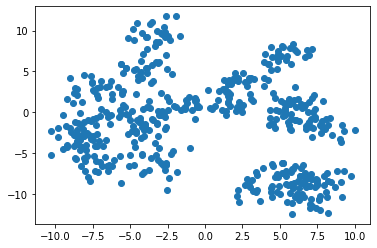

In [2]:
# Criando o dataset
#Pergunta 3
X, y = make_blobs(n_samples=500, centers=20, random_state=999)
plt.scatter(X[:,0], X[:,1])

In [3]:
# Função que calcula o melhor número de clusters com o algoritmo WCSS - Within-Cluster-Sum-of-Squares
def optimal_number_of_clusters(wcss):
    x1, y1 = 1, wcss[0]
    x2, y2 = len(wcss), wcss[len(wcss)-1]
    distances = []
    for i in range(len(wcss)):
        x0 = i + 1
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    
    return distances.index(max(distances)) + 1

Como o K-Means calcula a distância das observações até o centro do agrupamento ao qual ela pertence, essa distância deve ser a menor possível. Matematicamente falando, nós estamos buscando uma quantidade de agrupamentos em que a soma dos quadrados intra-clusters (ou do inglês within-clusters sum-of-squares, comumente abreviado para wcss) seja a menor possível, sendo zero o resultado ótimo.

In [4]:
# A partir do WCSS determinar o número de clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

n = optimal_number_of_clusters(wcss)
print(f'Numero de clusters: ', n)

Numero de clusters:  4


Clusters: 1     WCSS: 31547.372471390474
Clusters: 2     WCSS: 16949.21447214791
Clusters: 3     WCSS: 9464.847250570498
Clusters: 4     WCSS: 6005.444357917799
Clusters: 5     WCSS: 4717.404091931213
Clusters: 6     WCSS: 3662.640328609664
Clusters: 7     WCSS: 2976.003897606743
Clusters: 8     WCSS: 2490.737136802376
Clusters: 9     WCSS: 2050.207130755125
Clusters: 10     WCSS: 1842.881151568123
Clusters: 11     WCSS: 1662.3584633236007
Clusters: 12     WCSS: 1475.3665177098317
Clusters: 13     WCSS: 1307.39162492827
Clusters: 14     WCSS: 1161.0667161696576
Clusters: 15     WCSS: 1064.562396869835
Clusters: 16     WCSS: 981.4111416284912
Clusters: 17     WCSS: 912.4191152994657
Clusters: 18     WCSS: 852.7279032587843
Clusters: 19     WCSS: 788.702205109064
19


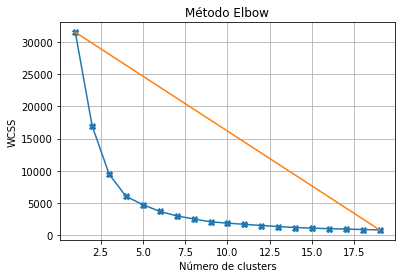

In [5]:
# Através do gráfico podemos confirmar ou não se o número gerado acima é o melhor
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append( kmeans.inertia_)
    print('Clusters:', i, '    WCSS:', wcss[i-1])

print(len(wcss))

plt.plot(range(1, 20), wcss, marker="X")
plt.plot([1, len(wcss)],[wcss[0], wcss[len(wcss)-1]])

plt.title('Método Elbow')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

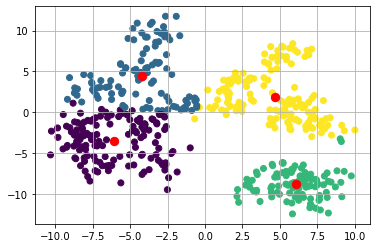

Coordenadas dos centroides:
 [[-6.10635026 -3.5270784 ]
 [-4.18061418  4.39438299]
 [ 6.07279058 -8.8012785 ]
 [ 4.6799272   1.81951975]]


In [6]:
# Plotando scatter com 4 centróides (melhor opção)

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)
pred1 = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:,1], c=pred1)
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()
print('Coordenadas dos centroides:\n', kmeans.cluster_centers_)

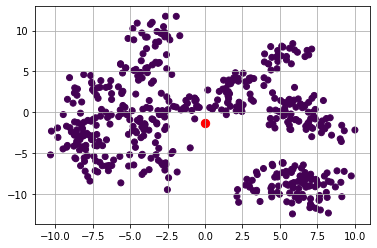

Coordenadas do centroide: [ [0.02618523] ,  [-1.30384304] ]


In [7]:
# Pergunta 4
# Utilizando o dataset com apenas um (1) Cluster

kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)
pred1 = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:,1], c=pred1)
plt.grid()

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()
print('Coordenadas do centroide: [',kmeans.cluster_centers_[:,0], ', ',kmeans.cluster_centers_[:,1], ']')

In [8]:
# Pergunta 5
kmeans = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)
print(kmeans.inertia_)

31547.372471390474


In [9]:
# Pergunta 6
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
kmeans.fit(X)
print(kmeans.inertia_)

4717.633364312667


## Questionário

#### Pergunta 1
Qual o objetivo do algoritmo K-Means?

- Seleção

- Correlação

- Classificação

- ***Clusterização***

 K-Means é uma algoritmo de clusterização (cluster) que faz o agrupamento de instâncias similares, utilizando técnica de classificação não-supervisionada

#### Pergunta 2
O algoritmo K-Means é baseado em qual tipo de aprendizagem?

- ***Não supervisionada***

- Por reforço

- Supervisionada

- Aleatória

#### Pergunta 3
Considerando o dataset gerado a partir das instruções do enunciado, qual das imagens representa o gráfico correto?

- Correta ![tpdad01.png](./Imagens/tpdad01.png)

- Errada ![tpdad02.png](./Imagens/tpdad02.png)

- Errada ![tpdad03.png](./Imagens/tpdad03.png)

- Errada ![tpdad04.png](./Imagens/tpdad04.png)

#### Pergunta 4
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo K-Means seja executado buscando apenas 1 cluster, qual será a coordenada do centroide ao final da execução?

- [1.9050166 4.91200285]

- ***[ 0.02618523 -1.30384304]***

- [ 2.40603415 6.29715718]

- [1.03796387 -5.49096674]


#### Pergunta 5
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando apenas 1 cluster, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

- 1068.2049059143994

- 34737.56779526727

- 61186.525771621105

- ***31547.372471390485***


#### Pergunta 6
Considere o dataset gerado a partir das instruções do enunciado. Caso o algoritmo seja executado buscando 5 clusters, qual será a soma dos quadrados intra-clusters (wcss) ao final da execução?

- ***4717.404091931214***

- 1853.7783832527882

- 6005.101775346179

- 9464.847250570496

#### Pergunta 7
Considerando o dataset gerado a partir das instruções do enunciado. Qual o número ideal de clusters?

- ***4***

- 7

- 5

- 3


#### Pergunta 8
Utilizando o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com as medidas “Confirmed”, “Deaths”, “Recovered” e “Active” apenas para a China (Mainland China), como fica o gráfico?

- Correta ![tpdad05.png](./Imagens/tpdad05.png)

- Errada ![tpdad06.png](./Imagens/tpdad06.png)

- Errada ![tpdad07.png](./Imagens/tpdad07.png)

- Errada ![tpdad08.png](./Imagens/tpdad08.png)


#### Pergunta 9
Utilizando o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Itália (Italy), analise as informações do dataset e responda: Em que mês o país passou a ter mais casos recuperados do que casos ativos?

- Fevereiro

- ***Maio***

- Março

- Abril


#### Pergunta 10
Utilizando o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Coreia do Sul (South Korea). Em que mês esse país atingiu o pico de casos ativos?

- ***Março***

- Janeiro

- Abril

- Fevereiro


#### Pergunta 11
Utilizando o Power BI e o dataset das instruções do enunciado. Ao criar um gráfico com a medida “Active” apenas para a Itália (Italy), como fica o gráfico?

- Correta ![dad-tp01-01.png](./Imagens/dad-tp01-01.png)

- Errada ![dad-tp01-02.png](./Imagens/dad-tp01-02.png)

- Errada ![dad-tp01-03.png](./Imagens/dad-tp01-03.png)

- Errada ![dad-tp01-04.png](./Imagens/dad-tp01-04.png)


#### Pergunta 12
Utilizando o Power BI e o dataset das instruções do enunciado. Filtre por país, selecionando a Venezuela, analise as informações, perceba que algumas vezes o número de casos recuperados foi maior que o de casos ativos. Em que mês isso ocorreu pela primeira vez?

- ***Abril***

- Fevereiro

- Março

- Maio
